## Chung Lu Adjacency Matrix Example.

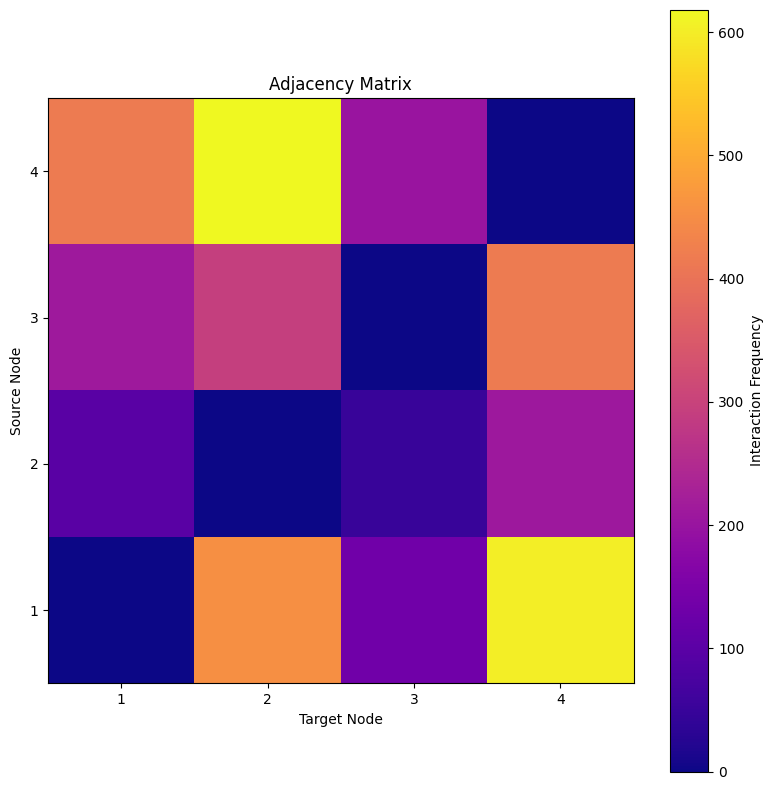

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

N=1000
def directed_chung_lu(k_out, k_in, random_state=None):
    
    rng = np.random.default_rng(random_state)
    k_out = np.asarray(k_out, dtype=float)
    k_in = np.asarray(k_in, dtype=float)

    n = len(k_out)
    if n != len(k_in):
        raise ValueError("k_out and k_in must have the same length.")
    if np.any(k_out < 0) or np.any(k_in < 0):
        raise ValueError("Degrees must be non-negative.")

    # total degree sum
    total_k = np.sum(k_out + k_in)
    if total_k == 0:
        raise ValueError("Total degree sum cannot be zero.")

    # Compute directed Chung–Lu probabilities
    P = np.outer(k_out, k_in) / total_k

    # Remove self-loops
    np.fill_diagonal(P, 0.0)

    # Cap probabilities to 1 (rare, only if sequences are extreme)
    P = np.clip(P, 0.0, 1.0)

    # Sample edges: Bernoulli trials (no multiedges)
    A = (rng.random(P.shape) < P).astype(np.uint8)

    # Build graph
    G = nx.DiGraph()
    G.add_nodes_from(range(n))
    source, target = np.nonzero(A)
    G.add_edges_from(zip(source, target))
    adj_matrix = np.zeros((n,n), dtype = int)
    for i in range(N):
        A = (rng.random(P.shape) < P)
        np.fill_diagonal(A, 0)
        adj_matrix += A.astype(int)
    return adj_matrix

# Example Degree list
k_out = [3,1,2,4]
k_in = [2,3,1,4]
R = directed_chung_lu(l , r)
def plot_full_matrix(adj_matrix, node_labels=None):
    n = adj_matrix.shape[0]

    # Set up figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot matrix as a heatmap
    cax = ax.imshow(adj_matrix, cmap='plasma', origin='upper')

    # Add colorbar
    cbar = fig.colorbar(cax, ax=ax)
    cbar.set_label('Interaction Frequency')

    # Label nodes if provided
    if node_labels:
        ax.set_xticks(np.arange(n))
        ax.set_yticks(np.arange(n))
        ax.set_xticklabels(node_labels, rotation=90)
        ax.set_yticklabels(node_labels)
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    ax.set_xticks(range(n))
    ax.set_yticks(range(n))
    ax.set_xticklabels(range(1, n+1))
    ax.set_yticklabels(range(1, n+1))
    ax.invert_yaxis()  # Invert so matrix rows appear top-down
    ax.set_xlabel("Target Node")
    ax.set_ylabel("Source Node")
    ax.set_title("Spy Plot with Opacity Indicating Edge Frequency")
    ax.set_title('Adjacency Matrix')

    plt.tight_layout()
    plt.show()
plot_full_matrix(R)

